# Data inspection

In [7]:
import tarfile
import shutil
import os
from csv import writer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

## Get data and prepare - should only be run once


Download UTKFace.tar.gz from https://drive.google.com/drive/folders/0BxYys69jI14kU0I1YUQyY1ZDRUE?usp=sharing

In [69]:
# open file
file = tarfile.open('data/UTKFace.tar.gz')
  
# extracting file
file.extractall('data/original/')
  
file.close()

### prepare labels and make folder with renamed files

The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

- [age] is an integer from 0 to 116, indicating the age
- [gender] is either 0 (male) or 1 (female)
- [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
- [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [70]:
org_folder = "data/original/UTKFace/"
new_folder = "data/UTKFace/"
os.makedirs(new_folder, exist_ok=True)

# get test data
# for idx, file in enumerate(os.listdir("data/original/UTKFace/")):
#     print(org_folder+file)
#     if file.endswith(".jpg"):
#         shutil.copy("data/original/UTKFace/"+file, org_folder+file)

#     if idx == 10:
#         break

# list files
files = os.listdir(org_folder)
num_files = len(files)

# create csv for storing information
def extract_info(new_file_name = None, original_filename = None):
    if original_filename is None or new_file_name is None:
        return ["filename","original_file_name","age","gender","race","datetime"] 
    else:
        age, gender, race, datetime = original_filename.split("_")
        datetime = datetime.split(".")[0]
        info = [new_file_name,original_filename,age,gender,race,datetime]
        return info

# write headers
with open(f"data/info.csv", "w", newline = "") as f:
    writer(f).writerow(extract_info())

# go through files, rename and add info to csv file
for idx, file in enumerate(files):    
    if file.endswith(".jpg"):
        new_name = str(idx+1).zfill(np.log10(num_files+1).astype(int)+1) + ".jpg"
        
        # store info
        try:
            with open("data/info.csv", "a+", newline = "") as f:
                writer(f).writerow(extract_info(new_name, file))
        except:
            print("Error extracting name from file: ", file)
            continue

        # move and rename
        shutil.move(org_folder+file, new_folder + new_name)



## Read saved data

In [76]:
print("Info could not be extracted from the following files:\n", "\n".join(os.listdir("data/original/UTKFace/")))

Info could not be extracted from the following files:
 39_1_20170116174525125.jpg.chip.jpg
61_1_20170109142408075.jpg.chip.jpg
61_1_20170109150557335.jpg.chip.jpg


In [3]:
df = pd.read_csv("data/info.csv")
df

,filename,original_file_name,age,gender,race,datetime
0,00001.jpg,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0,20170112213500903
1,00002.jpg,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0,20170112215240346
2,00003.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0,20170110183726390
3,00004.jpg,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0,20170112213001988
4,00005.jpg,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0,20170112213303693
...,...,...,...,...,...,...
23700,23704.jpg,9_1_3_20161220222856346.jpg.chip.jpg,9,1,3,20161220222856346
23701,23705.jpg,9_1_3_20170104222949455.jpg.chip.jpg,9,1,3,20170104222949455
23702,23706.jpg,9_1_4_20170103200637399.jpg.chip.jpg,9,1,4,20170103200637399
23703,23707.jpg,9_1_4_20170103200814791.jpg.chip.jpg,9,1,4,20170103200814791


## label dicts


In [4]:
gender_dict = {0:"male", 1:"female"}
race_dict = {0:"white", 1:"black", 2:"asian", 3:"indian", 4:"others"}

## Show examples

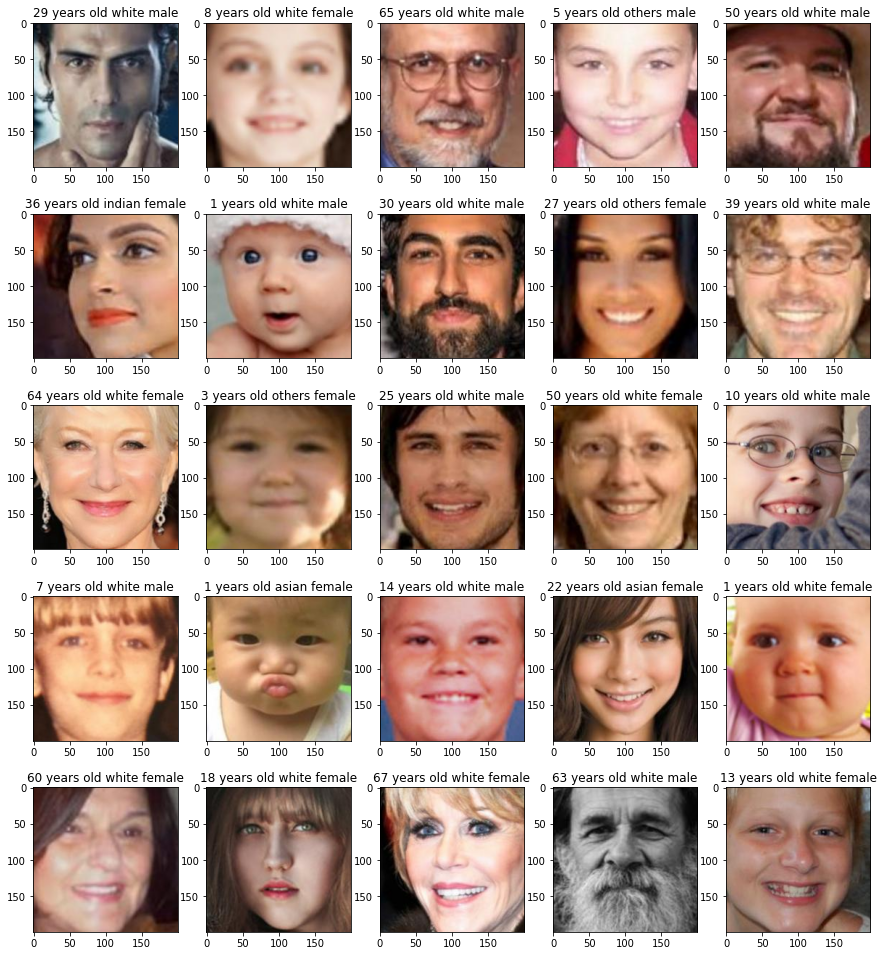

In [5]:
idxs = np.random.permutation(len(df))
n = 25
nrows = 5
ncols = 5

fig, ax = plt.subplots(ncols=nrows, nrows=ncols, figsize = (3*ncols, int(3.5*nrows)))

# plot random faces
for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols+j
        ax[i, j].imshow(plt.imread(f"data/UTKFace/{df.filename[idxs[idx]]}"))
        ax[i, j].set_title(f"{df.iloc[idxs[idx]]['age']} years old {race_dict[df.iloc[idxs[idx]]['race']]} {gender_dict[df.iloc[idxs[idx]]['gender']]}")

## Distributions

[Text(0, 0, 'WHITE'),
 Text(1, 0, 'BLACK'),
 Text(2, 0, 'ASIAN'),
 Text(3, 0, 'INDIAN'),
 Text(4, 0, 'OTHERS')]

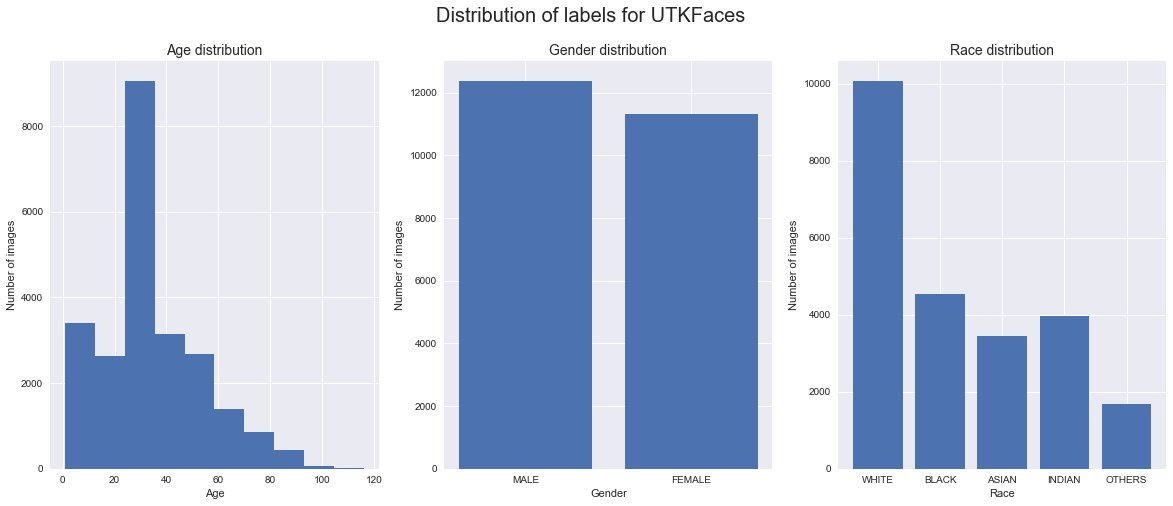

In [30]:
fig, ax = plt.subplots(1,3,figsize = (20, 7.5))

fig.suptitle("Distribution of labels for UTKFaces", fontsize = 20)# fontdict = {"size":20})

ax[0].hist(df.age)
ax[0].set_title("Age distribution", fontsize = 14)
ax[0].set_ylabel("Number of images")
ax[0].set_xlabel("Age")

genders, counts = np.unique(df.gender, return_counts=True)
ax[1].bar(genders, counts)
ax[1].set_title("Gender distribution", fontsize = 14)
ax[1].set_ylabel("Number of images")
ax[1].set_xlabel("Gender")
ax[1].set_xticks(genders)
ax[1].set_xticklabels([gender_dict[gender].upper() for gender in genders])


races, counts = np.unique(df.race, return_counts=True)
ax[2].bar(races, counts)
ax[2].set_title("Race distribution", fontsize = 14)
ax[2].set_ylabel("Number of images")
ax[2].set_xlabel("Race")
ax[2].set_xticks(races)
ax[2].set_xticklabels([race_dict[race].upper() for race in races])
